Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, reklamową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję $Z(w_{TV}, w_{radio}, w_{prasa})$. Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci. Proszę porównać wyniki (MSE) dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące.

In [11]:
import pandas as pd
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv('advertising.csv')
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
models = [
    (MLPRegressor(hidden_layer_sizes=(60,60,60,60,60), activation='relu', max_iter=10000), '5 warstw po 60 neuronów (ReLU)'),
    (MLPRegressor(hidden_layer_sizes=(80,80,80,80,80,80,80,80,80,80,80,80), activation='relu', max_iter=10000), '12 warstw po 80 neuronów (ReLU)'),
    (MLPRegressor(hidden_layer_sizes=(60,60,60,60,60), activation='tanh', max_iter=10000), '5 warstw po 60 neuronów (tanh)'),
    (MLPRegressor(hidden_layer_sizes=(80,80,80,80,80,80,80,80,80,80,80,80), activation='tanh', max_iter=10000), '12 warstw po 80 neuronów (tanh)'),
]
for model, name in models:
    print(f'\n{name}:')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')


5 warstw po 60 neuronów (ReLU):
MSE: 3.5706440536461828

12 warstw po 80 neuronów (ReLU):
MSE: 1.8328193498735288

5 warstw po 60 neuronów (tanh):
MSE: 0.5356746153720409

12 warstw po 80 neuronów (tanh):
MSE: 19.664977085422976


**Wnioski:** Najgorzej 12 warstw po 80 tahn, najlepiej 5 warstw po 60 tanh, reszta blisko lepszej wartości.

Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji $f(x) = sin(x)$ w przedziale $[-2\pi,2\pi]$. Proszę użyć $tanh$ jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.

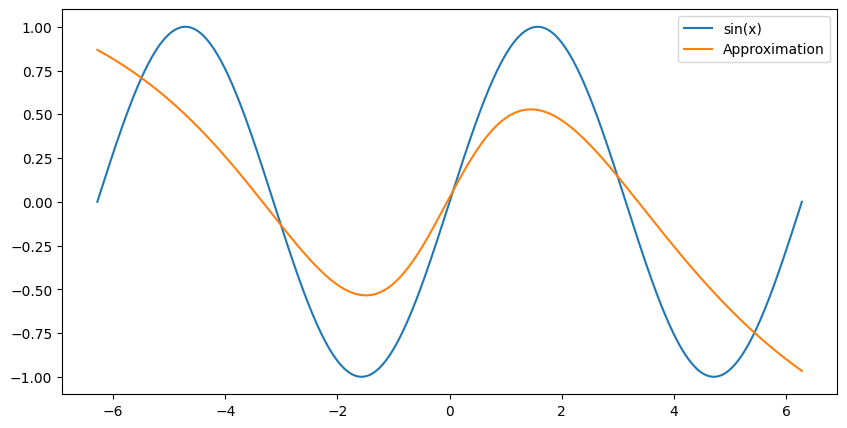

f(x) = 0.73 * tanh(-0.18 * x + -0.15) + -0.29


In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)
y = np.sin(x)
model = MLPRegressor(hidden_layer_sizes=(16,), activation='tanh', max_iter=10000, tol=0.001, random_state=1)
model.fit(x, y.ravel())
y_pred = model.predict(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='sin(x)')
plt.plot(x, y_pred, label='Approximation')
plt.legend()
plt.show()
hidden_layer_weights = model.coefs_[0]
output_layer_weights = model.coefs_[1]
hidden_layer_biases = model.intercepts_[0]
output_layer_bias = model.intercepts_[1][0]
approx_function = "f(x) = " + f"{round(output_layer_weights[0][0], 2)} * tanh({round(hidden_layer_weights[0][0], 2)} * x + {round(hidden_layer_biases[0], 2)}) + " + str(round(output_layer_bias, 2))
print(approx_function)

**Wnioski:** W środku przedziału dobre dopasowanie na niskiej liczbie neuronów, przy granicach rozjazd 

Proszę pobrać zbiór california housing (można go załadować w sklearnie dzięki funkcji fetch_california_housing( ), jest też dostępny w colabie jako przykładowy plik testowy w colabie). Zawiera nieznormalizowane dane dotyczące bloków mieszkalnych w Kaliforni zebranych w 1990 roku, takie jak lokacja geograficzna, wiek, całkowita liczba mieszkańców bloku, znajdujące się w nim mieszkania i sypialnie, oraz mediana dochodów tych mieszkańców. W ostatniej kolumnie znajduje się mediana wartości mieszkania w tym bloku. Proszę znormalizować dane, a następnie zaproponować kilka wielowarstowych sieci neuronowych i ocenić jak dobrze dokonają aproksymacji funkcji mediany wartości mieszkań za pomocą opisanych dzisiaj metryk. Proszę spróbować osiągnąć jak najlepszy wynik (jak najniższe MSE). Wyniki oczywiście proszę sprawdzać na danych testujących.

In [118]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
models = [
    MLPRegressor(hidden_layer_sizes=(10,), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(50,), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(100,), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(200,), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(200, 200), max_iter=10000, random_state=1)
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Model {model.hidden_layer_sizes}: MSE = {mse}")

Model (10,): MSE = 0.34034775735051614
Model (50,): MSE = 0.3012780032265586
Model (100,): MSE = 0.29336807673980847
Model (200,): MSE = 0.28934241863929655
Model (10, 10): MSE = 0.31150143773179145
Model (50, 50): MSE = 0.2693169421822541
Model (100, 100): MSE = 0.26865344807959
Model (200, 200): MSE = 0.27251510288743086


**Wnioski:** Najlepsze dla 100,100, podobne 50,50 i 200,1, 200,200 juz gorzej, najgorsze 10,1

Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz uzyskanych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.

C:\Users\aleks\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


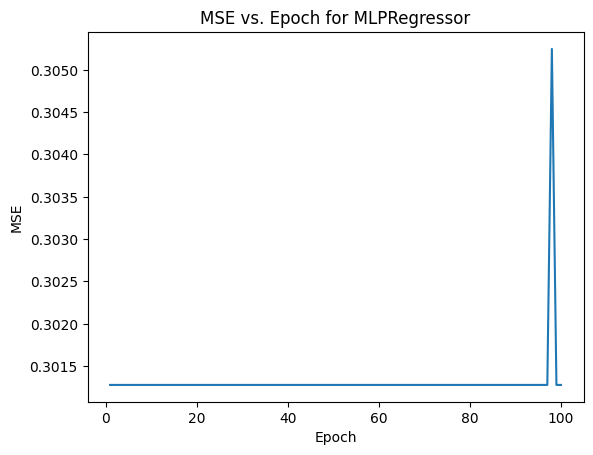

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = MLPRegressor(hidden_layer_sizes=(100,100), max_iter=1000, random_state=1)
epochs = []
mses = []
for i in range(100):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    epochs.append(i+1)
    mses.append(mse)
plt.plot(epochs, mses)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epoch for MLPRegressor')
plt.show()

**Wnioski:**

Proszę sprawdzić wyniki regresji dla zbioru california housing dla różnych podziałów na dane uczące i testujące (dla co najmniej pięciu podziałów 20-80, 35-65, 50-50, 65-35, 80-20) i wyciągnąć wnioski.

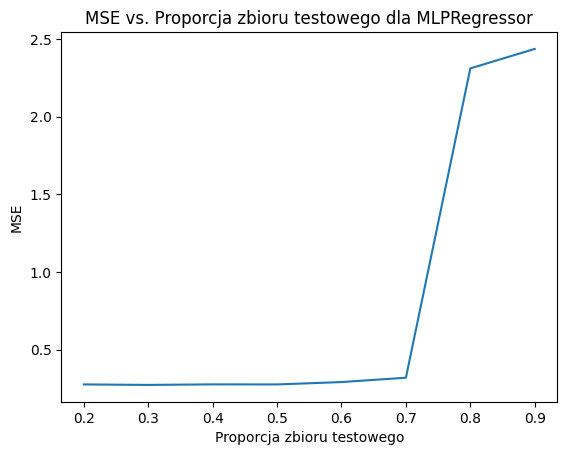

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
splits = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
mses = []
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=1)
    model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
plt.plot(splits, mses)
plt.xlabel('Proporcja zbioru testowego')
plt.ylabel('MSE')
plt.title('MSE vs. Proporcja zbioru testowego dla MLPRegressor')
plt.show()

**Wnioski:** Do proporcji ok 70/30 MSE stabilne, później rosnące. Największy wzrost między 0.7/0.3 a 0.8/0.2.

Można spróbować (już po normalizacji) zmniejszyć wymiarowość zbioru california housing. Żeby to osiągnąć, opcją jest np. odrzucić pierwsze dwie kolumny, albo dokonać zmniejszenia wymiarowości powszechnie używanym algorytmem PCA (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, w dokumentacji są przykłady użycia). Wtedy można zbadać jak zmieni się działanie sieci po takim zabiegu.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_pca = mean_squared_error(y_test, y_pred)
X_drop = X[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_drop = mean_squared_error(y_test, y_pred)
print(f"MSE z PCA: {mse_pca}")
print(f"MSE z usunięciem dwóch pierwszych kolumn: {mse_drop}")
print(f"MSE bez zmiany: {mse}")

MSE z PCA: 0.36112078480951054
MSE z usunięciem dwóch pierwszych kolumn: 0.2882151412874784
MSE bez zmiany: 0.27665150551200507


**Wnioski:** Usunięcie dwoch kolumn zadziałało lepiej niż algorytm PCA